In [32]:
X = randn(Float32, 5, 100)
y1 = 2 * cos.(X[4, :]) + X[1, :] .^ 2 .- 2
y2 = 2 * sin.(X[4, :]) + X[1, :] .^ 2 .- 2
y = vcat(transpose.((y1,y2))...)

2×100 Matrix{Float32}:
 2.91704    1.4144   -1.29478    …  -0.689542  -0.0741968  0.0412788
 0.211003  -1.19874   0.0473113     -0.387259   1.6539     0.0832462

In [34]:
using SymbolicRegression

options = SymbolicRegression.Options(
    binary_operators=[+, *, /, -],
    unary_operators=[cos, exp],
    npopulations=20
)

hall_of_fame = EquationSearch(
    X, y, niterations=10, options=options,
    parallelism=:multithreading
)

#dominating = calculate_pareto_frontier(X, y, hall_of_fame, options)

┌ Warning: You are using multithreading mode, but only one thread is available. Try starting julia with `--threads=auto`.
└ @ SymbolicRegression C:\Users\Simon\.julia\packages\SymbolicRegression\5YJIk\src\SymbolicRegression.jl:411


Started!

Cycles per second: 6.270e+04
Head worker occupation: 4.0%
Progress: 173 / 400 total iterations (43.250%)
Best equations for output 1
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.391e+00  -1.000e-10  0.22458969
2           1.804e+00  2.819e-01  cos(x4)
3           1.678e+00  7.189e-02  (x1 * x1)
4           1.505e+00  1.090e-01  cos(x4 / x1)
5           9.048e-01  5.088e-01  (cos(x4) - cos(x1))
7           1.374e-01  9.425e-01  ((cos(x4) - cos(x1)) / 0.422856)
9           6.095e-02  4.064e-01  ((cos(x4 * -0.8861885) - cos(x1)) / 0.3827345)
11          4.157e-02  1.913e-01  ((((cos(x4) * 0.72907156) - cos(x1)) + 0.22135422) * 2.7933478)
13          4.157e-02  1.490e-07  (((((cos(x4) * 0.72905374) - cos(x1)) + 0.25809214) * 2.79341) + -0.10254876)
18          3.789e-02  1.856e-02  (((cos(x4) - (cos(x1) - 0.076041564)) / cos(cos(cos(exp(-0.5604068 - cos(x1)))))) * 1.7476065)
20          3.726e-02  8.409e-03  (((co

2-element Vector{HallOfFame{Float32}}:
 HallOfFame{Float32}(PopMember{Float32}[PopMember{Float32}(0.22458969, 1.0032f0, 2.3909693f0, 16783633910330000, 7642424885124635073, 3386251768827864164), PopMember{Float32}(cos(x4), 0.76072085f0, 1.803558f0, 16783633900730000, 3606584264507905222, 1387548622826100860), PopMember{Float32}((x1 * x1), 0.7115995f0, 1.6784594f0, 16783633914640000, 5493142466077815992, 4649799027060875078), PopMember{Float32}(cos(x4 / x1), 0.64228195f0, 1.505072f0, 16783633899600000, 9055631307935763502, 3901351663339155118), PopMember{Float32}((cos(x4) - cos(x1)), 0.3944387f0, 0.90483534f0, 16783633912260000, 751308972263651506, 8889072429084505026), PopMember{Float32}(((x1 * x1) - cos(-0.045699276)), 0.4363511f0, 0.99739546f0, 16783633925800000, 3361795448066755686, 2231624604573981296), PopMember{Float32}(((cos(x4) - cos(x1)) / 0.422856), 0.07985778f0, 0.1373798f0, 16783633943350000, 8821620192451369960, 5007263439752724539), PopMember{Float32}(((cos(x4) - cos(x1))

In [12]:
for member in dominating
    complexity = compute_complexity(member.tree, options)
    loss = member.loss
    string = string_tree(member.tree, options)

    println("$(complexity)\t$(loss)\t$(string)")
end

1	7.258385	0.41009447
2	6.7705197	cos(x4)
3	1.2349528	(x1 * x1)
5	0.7353727	((x1 * x1) + -0.70689815)
6	0.5701283	((x1 * x1) * cos(x4))
7	0.3362266	((x1 * x1) - (x4 * x4))
8	0.18439533	(((x1 * x1) + cos(x4)) - 1.3769026)
9	0.046046812	((x1 * x1) - ((x4 * 0.66932744) * x4))
11	0.029612415	((x1 * x1) - (((x4 * 0.61749774) * x4) + 0.15350315))
13	0.009277596	((x1 * x1) - ((x4 * cos(cos(exp(cos(x4))))) * x4))
16	0.0053216335	((x1 * x1) - (((x4 * x4) + 0.071035616) * cos(cos(cos(x4 / -2.0705166)))))
17	0.0042603337	(((((x1 * x1) + 1.9596716) - ((x4 / 1.7617557) * x4)) - 1.4403225) - cos(cos(x4)))


In [49]:
#@variables x1,x2,x3,x4
eqn = node_to_symbolic(dominating[end].tree, options)

((cos(x4)*2.0) - (x1*(-2.692741e-8 - x1))) - 2.0

In [65]:
X = [[0,2,3,π/2,5] [1,2,3,4,5]]

5×2 Matrix{Float64}:
 0.0     1.0
 2.0     2.0
 3.0     3.0
 1.5708  4.0
 5.0     5.0

In [66]:
eval_tree_array(dominating[end].tree, X, options)

┌ Warning: Warning: eval_tree_array received mixed types: tree=Float32 and data=Float64.
└ @ DynamicExpressions.EvaluateEquationModule C:\Users\Simon\.julia\packages\DynamicExpressions\h515v\src\EvaluateEquation.jl:82


([-1.9999999999999998, -2.307287214799814], true)

In [14]:
print(size(y))
size(X)

(100,)

(5, 100)

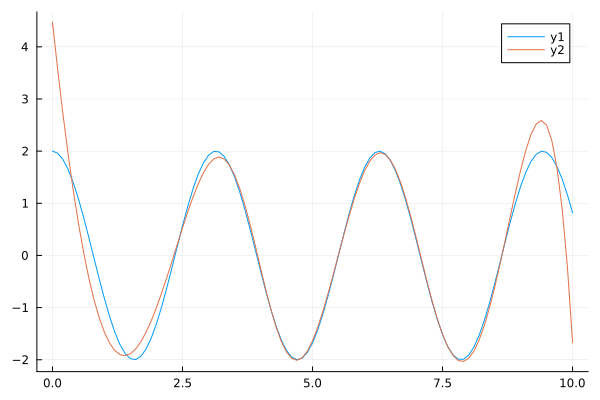

In [2]:
using BSplineKit, Plots

f(x) = sin(2x)
f_diff(x) = 2*cos(2x)
x = 0:1:10
y = f.(x)
spl = interpolate(x, y, BSplineOrder(6))
D1f = diff(spl, Derivative(1))

x = 0:0.1:10

plot(x, f_diff.(x))
plot!(x, D1f.(x))

In [36]:
function data_diff(x, t)
    mapslices(x -> data_diff_1dim(x,t), x, dims=2)
end

function data_diff_1dim(x, t)
    spl = interpolate(t, x, BSplineOrder(6))
    diff(spl, Derivative(1)).(t)
end

data_diff_1dim (generic function with 1 method)